# BBC - Projet
## Diagnostic miARN pour détecter le cancer de la prostate

- Professeur: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistante: Aitana Lebrand (<a href="mailto:aitana.nevesdasilva@heig-vd.ch">aitana.nevesdasilva@heig-vd.ch</a>)
- Etudiant: Jan Purro (<a href="mailto:jan.purro@heig-vd.ch">jan.purro@heig-vd.ch</a>)
- Etudiant: Thibault Schowing (<a href="mailto:thibault.schowing@heig-vd.ch">thibault.schowing@heig-vd.ch</a>)

Date: Printemps 2016

Note: Ce projet est largement inspiré du laboratoire 3-4 de BBC-2016

> ## Objectifs pédagogiques


> ## But du projet



> ## Démarche


> ## Rapport de labo



In [1]:
import os
import numpy as np
import pylab as plt
import pandas as pd
import numpy as np
from Bio import Geo
%matplotlib inline 

# Fonctionne pour les fichiers .soft
def load_geo(myfile):
    handle = open(myfile)
    records = Geo.parse(handle)
    return records

# Les différents records, le soft n'es pas forcément utile.

#records_soft = load_geo('../data/GSE45604_family.soft')
records_matrix = open('../data/GSE45604_series_matrix.txt')

# Données brutes (uniquement les lignes avec condition et miARN)
matrice =  [l.split('\t') for l in records_matrix.readlines()[67:-1]]
records_matrix.seek(0)
conditions = records_matrix.readlines()[34].split('\t')


# matrice <list> -> <ndarray>
matrice = np.array(matrice)
conditions = np.array(conditions[1:])

# On a 2 types de cellules: prostate normale ou cancéreuse qu'on va marquer PCa ou Normal
idx_normal = []
idx_pca = []
i = 1
for c in conditions:
    if c.startswith('"PCa'):
        matrice[0,i] = 'PCa'
        idx_pca.append(i)
    else:
        matrice[0,i] = 'Normal'
        idx_normal.append(i)
    i += 1

# TODO: mettre dans l'ordre Normale puis PCa
idx_ordered = [0] + idx_normal + idx_pca
print("idx: ")
print(idx_ordered)      

# AVANT TRANSPOSITION
# Matrice[0] contient ID_REF - PCa - PCa - ... - Normal - PCa - ...
# Matrice[1] contient 234342_st - 23.3 - 342.3 - ...
# Matrice[:,0] contient ID_REF suivi de tous les id de gènes
# Matrice[:,1...n] Contient PCa ou normal suivi de toutes les mesures pour ce prélèvement sur un patient atteint ou non
print matrice

# On réordonne avec les Idx dans le bon ordre
matrice = matrice[:,idx_ordered]

idx: 
[0, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[['"ID_REF"' 'PCa' 'PCa' ..., 'PCa' 'PCa' 'PCa']
 ['"1367452_st"' '10.93488' '13.60777' ..., '16.10932' '14.50111'
  '15.29177\n']
 ['"1367453_st"' '14.42092' '15.43682' ..., '15.15539' '17.9957'
  '25.17342\n']
 ..., 
 ['"zma-miR529_st"' '15.90142' '20.75771' ..., '12.53141' '13.16191'
  '13.03476\n']
 ['"zma-miR827-star_st"' '14.19222' '17.82426' ..., '14.37837' '16.76542'
  '16.02319\n']
 ['"zma-miR827_st"' '15.00203' '13.44333' ..., '14.51185' '11.54497'
  '13.00997\n']]


In [2]:
# Diviser le dataset en deux -> test et train


print matrice[0,:]

#print(np.shape(matrice)) # (20644,61)

idx_test = [5,9,19,28,32,60]
idx_train = range(0,len(matrice[0]))
[idx_train.remove(i) for i in idx_test]
#idx_train.remove(0)

print("IDX test: ", idx_test)
print("IDX train: ", idx_train)

data = matrice
data_test = data[:,idx_test]
data = data[:,idx_train]

print("Matrice Test", matrice[:, idx_test])


['"ID_REF"' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa'
 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa'
 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa'
 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa'
 'PCa' 'PCa' 'PCa' 'PCa' 'PCa' 'PCa']
('IDX test: ', [5, 9, 19, 28, 32, 60])
('IDX train: ', [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59])
('Matrice Test', array([['Normal', 'Normal', 'PCa', 'PCa', 'PCa', 'PCa'],
       ['11.47406', '13.86868', '14.12206', '14.15627', '11.64925',
        '15.29177\n'],
       ['14.39909', '16.66849', '16.31204', '20.05932', '15.40274',
        '25.17342\n'],
       ..., 
       ['15.43849', '17.41694', '14.67161', '16.80459'

[['"ID_REF"' 'Normal' 'Normal' ..., 'PCa' 'PCa' 'PCa']
 ['"1367452_st"' '17.73092' '13.50618' ..., '17.9872' '16.10932' '14.50111']
 ['"1367453_st"' '15.98614' '17.80959' ..., '19.47316' '15.15539' '17.9957']
 ..., 
 ['"zma-miR529_st"' '18.99103' '13.52609' ..., '13.46852' '12.53141'
  '13.16191']
 ['"zma-miR827-star_st"' '15.40228' '14.92211' ..., '15.38391' '14.37837'
  '16.76542']
 ['"zma-miR827_st"' '17.98331' '17.41605' ..., '10.7645' '14.51185'
  '11.54497']]
desired_profile = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


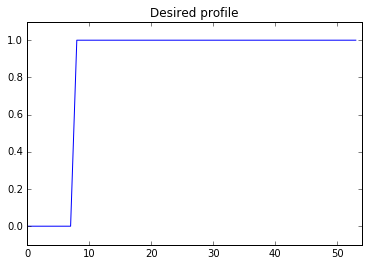

In [3]:

print(data)

desired_profile = [1 if s =='PCa' else 0 for s in data[0,1:]]
print('desired_profile = '+str(desired_profile))


# Représentation graphique de Desired Profile:

fig = plt.figure()

plt.plot(desired_profile)
plt.ylim([-0.1,1.1])
plt.xlim([0,len(desired_profile)])
plt.title('Desired profile')
plt.show()


54
55


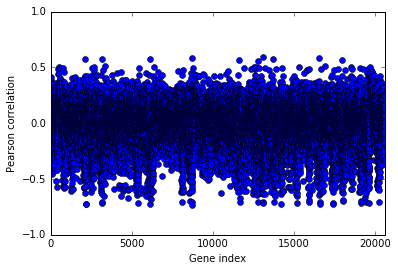

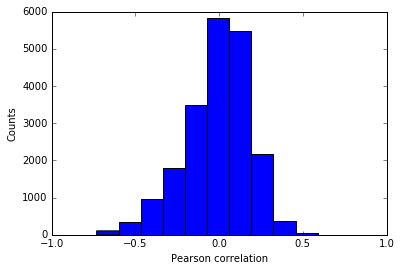

In [4]:
# Correlation
print(len(desired_profile))
print(len(data[0]))

def pearson_genes(data,desired_profile,show_plot=1):

    import scipy.stats as ss

    
    correl = [] # contains the correlation for each gene
    correl_p  = [] # for now, do not try to understand what correl_p is...
    
    # loop over genes
    for i in range(np.shape(data)[0]-1): # do not consider first line of data (=header)
        
        gene_expression = data[i+1,1:] # do not consider first  column (= gene identifiers)
        gene_expression = np.array(gene_expression,dtype=float) # convert to float
        
        pearson_corr = ss.pearsonr(gene_expression,desired_profile) # calculate Pearson correlation
        correl.append(pearson_corr[0])
        correl_p.append(pearson_corr[1]) # forget about this for now...
        
    correl = np.array(correl,dtype=float) # convert to array... easier to manipulate
    
    # plot correlation values
    if show_plot:
        fig = plt.figure()
        plt.plot(correl,'bo')
        plt.ylim([-1,1])
        plt.xlim([0,len(correl)])
        plt.xlabel('Gene index')
        plt.ylabel('Pearson correlation')
        plt.show()
        
        plt.figure()
        plt.hist(correl)
        plt.xlabel('Pearson correlation')
        plt.ylabel('Counts')
        plt.xlim([-1,1])
        plt.show()

    return (correl,correl_p)

co = pearson_genes(data,desired_profile)
corr = co[0]

In [5]:
def shuffle_data(data):
    
    from random import shuffle
    
    # get shuffled columns indexes
    shuffled_idx = range(1,np.shape(data)[1]) # ! do not shuffle the first colum (= gene identifiers)
    shuffle(shuffled_idx) # shuffled_idx is now shuffled
    #print (shuffled_idx)
    shuffled_idx.insert(0,0)

    # use shuffled_idx to randomize the columns of data
    data_random = data[:,shuffled_idx]
    data_random[0,:] = data[0,:] # put label conditons on top again

    return data_random
    
data_random = shuffle_data(data)


('Correlation: ', array([ 0.1523704 ,  0.03078626, -0.20074176, ...,  0.15900731,
       -0.16692147, -0.32629467]))
('Correl rand: ', array([-0.12699517, -0.09120475,  0.01005194, ..., -0.04066433,
       -0.27949448,  0.06002105]))


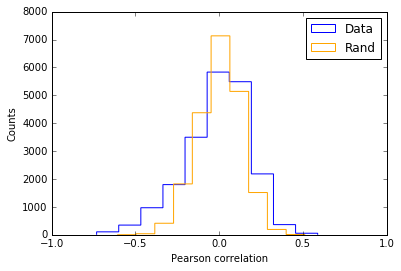

In [6]:
co = pearson_genes(data,desired_profile,0)
corr = co[0]
co_rand = pearson_genes(data_random, desired_profile,0)
corr_rand = co_rand[0]

# plot correlation values
print("Correlation: ", corr)
print("Correl rand: ", corr_rand)


plt.figure()
#plt.hist([corr, corr_rand], histtype='step', stacked=True, color=['Blue', 'Orange'], label=['Data', 'Rand'])
plt.hist(corr, histtype='step', stacked=True, color=['Blue'], label=['Data'])
plt.hist(corr_rand, histtype='step', stacked=True, color=['Orange'], label=['Rand'])
plt.xlabel('Pearson correlation')
plt.ylabel('Counts')
plt.xlim([-1,1])
plt.legend()

plt.show()

In [17]:
# Randomisation plusieurs fois, si déjà fait -> prendre fichier
N_genes = np.shape(data)[0]-1 #Nombre de gènes
N_random = 200
corr_random = np.empty((N_genes,N_random),dtype=float) 

def randomize_data(): 
    
    print(np.shape(corr_random))

    #Votre code...
    print("Loading...")
    for i in range(0, N_random ):
        data_rand = shuffle_data(data)
        correlation = pearson_genes(data_rand, desired_profile,0)
        patate = correlation[0]
        print("Pass "+ str(i+1)+ "/"+ str(N_random))
        corr_random[:,i] = patate

    print("\nDone !! \nCorr_random: ")
    print(corr_random)

    np.save('corr_randomized.npy', corr_random)
    
#Data randomized in corr_randomized.npy file
#randomize_data()
corr_random = np.load('corr_randomized.npy')
print(corr_random)

(20643, 200)
Loading...
Pass 1/200
Pass 2/200
Pass 3/200
Pass 4/200
Pass 5/200
Pass 6/200
Pass 7/200
Pass 8/200
Pass 9/200
Pass 10/200
Pass 11/200
Pass 12/200
Pass 13/200
Pass 14/200
Pass 15/200
Pass 16/200
Pass 17/200
Pass 18/200
Pass 19/200
Pass 20/200
Pass 21/200
Pass 22/200
Pass 23/200
Pass 24/200
Pass 25/200
Pass 26/200
Pass 27/200
Pass 28/200
Pass 29/200
Pass 30/200
Pass 31/200
Pass 32/200
Pass 33/200
Pass 34/200
Pass 35/200
Pass 36/200
Pass 37/200
Pass 38/200
Pass 39/200
Pass 40/200
Pass 41/200
Pass 42/200
Pass 43/200
Pass 44/200
Pass 45/200
Pass 46/200
Pass 47/200
Pass 48/200
Pass 49/200
Pass 50/200
Pass 51/200
Pass 52/200
Pass 53/200
Pass 54/200
Pass 55/200
Pass 56/200
Pass 57/200
Pass 58/200
Pass 59/200
Pass 60/200
Pass 61/200
Pass 62/200
Pass 63/200
Pass 64/200
Pass 65/200
Pass 66/200
Pass 67/200
Pass 68/200
Pass 69/200
Pass 70/200
Pass 71/200
Pass 72/200
Pass 73/200
Pass 74/200
Pass 75/200
Pass 76/200
Pass 77/200
Pass 78/200
Pass 79/200
Pass 80/200
Pass 81/200
Pass 82/200
P

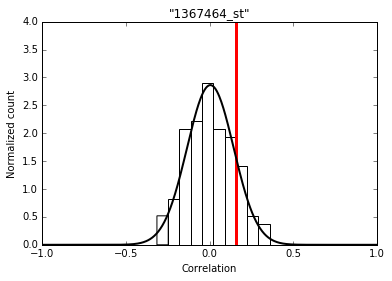

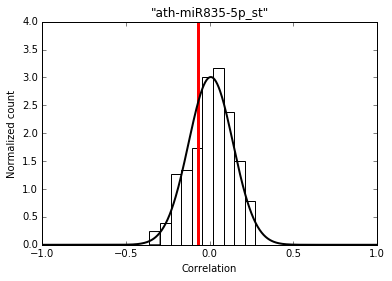

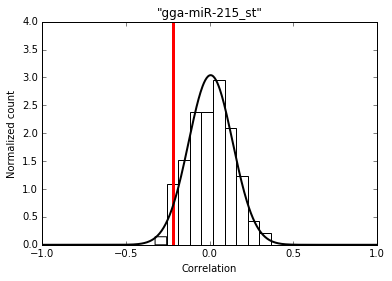

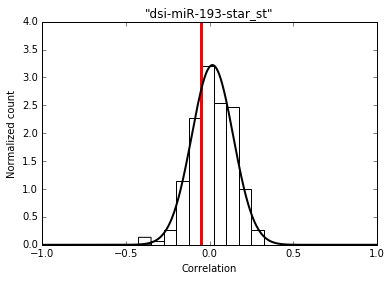

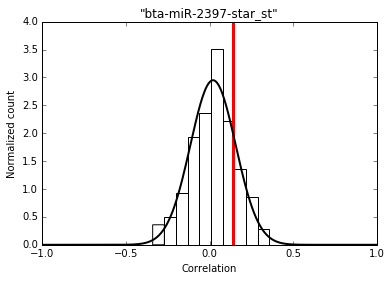

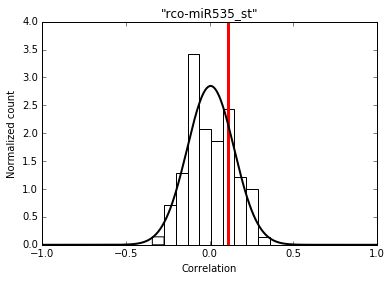

In [19]:
from scipy.stats import norm
# show results only for these genes
idx_genes_to_show = [12,1181,8590,5592, 2345,17836] 

# plot: loop over idx_genes_to_show
for idx in idx_genes_to_show: 
    fig = plt.figure()
    random_correlations = corr_random[idx,:]
    plt.hist(random_correlations,normed=True,color='w') # histogramme des valeurs de corrélation obtenues à partir des données randomisées
    plt.vlines(corr[idx],0,4,'r',lw=3) # valeur observée = ligne verticale rouge
    plt.title(data[idx+1,0]) # nom du gène
    plt.xlim([-1,1])
    plt.ylim([0, 4])
    plt.xlabel('Correlation')
    plt.ylabel('Normalized count')
    
    # fit gaussian to distribution of correlations from randomized data
    xx = np.linspace(-1,1,500)
    mu = np.mean(random_correlations)
    sigma = np.std(random_correlations)
    plt.plot(xx,norm.pdf(xx,loc=mu,scale=sigma),'k-',lw=2)

('Observed Correlation for gene ', 12, ' Named: ', '14.89865', ' : ', 0.15930269191270469)
('Mean Random: ', 0.0044092239731511581)


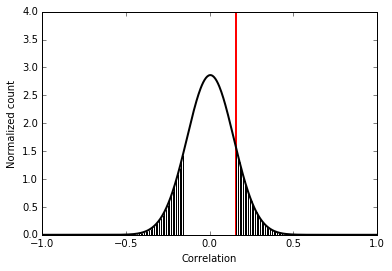

('Observed Correlation for gene ', 1181, ' Named: ', '14.66558', ' : ', -0.070497816838252805)
('Mean Random: ', 0.0071328378128241556)


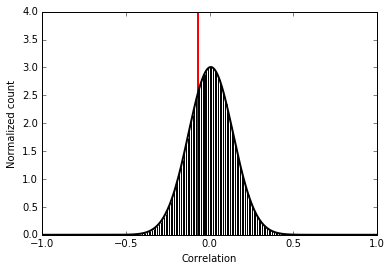

('Observed Correlation for gene ', 17836, ' Named: ', '14.18109', ' : ', 0.10991829147419775)
('Mean Random: ', 0.0060601775321961126)


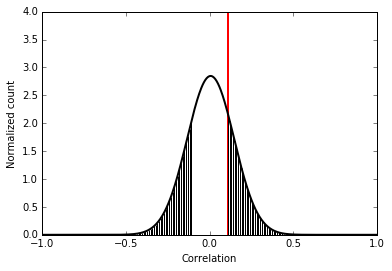

In [22]:
N_genes = np.shape(data)[0]-1 # number of genes in the data

pval_correl = [] # p-values 
for idx in range(0,N_genes):
    
    # random correlation: calculate mean and standard deviation
    random_correlations = corr_random[idx,:]
    mean_random = np.mean(random_correlations)
    std_random = np.std(random_correlations)
    
    # observed correlation
    observed_correlation = corr[idx]
    
    # cdf: cumulative distribution function = integral of the gaussian distribution from -inf to observed_correlation
    cdf = norm.cdf(observed_correlation,loc=mean_random,scale=std_random)
    if cdf >= 0.5:
        p = 1 - cdf
    else:
        p = cdf
    pval_correl.append(2*p) # factor 2 because correlations can take both positive and negative values
    
    # show p-value visually for the first gene (p-value = area of black hatched regions under the curve)
    if idx==12 or idx==1181 or idx==17836:
        print('Observed Correlation for gene ', idx, ' Named: ', data[idx+1,1] ,' : ', observed_correlation)
        print('Mean Random: ', mean_random)
        plt.figure()
        plt.plot(xx,norm.pdf(xx,loc=mean_random,scale=std_random),'k-',lw=2)
        plt.vlines(corr[idx],0,4 ,'r',lw=2)
        for j in np.linspace(observed_correlation,1,100*(1-observed_correlation)):
            plt.vlines(j,0,norm.pdf(j,loc=mean_random,scale=std_random),'k',lw=1)
        for j in np.linspace(-1,-observed_correlation,100*(1-observed_correlation)):
            plt.vlines(j,0,norm.pdf(j,loc=mean_random,scale=std_random),'k',lw=1)
        plt.xlabel('Correlation')
        plt.ylabel('Normalized count')
        plt.show()

In [24]:
import stats

-log10(p-value FDR) = 4.38384048441



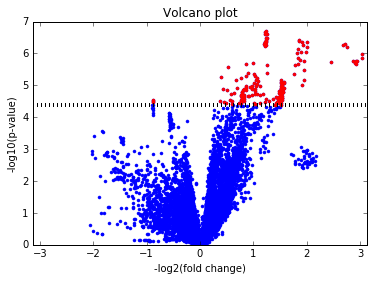

179 significant genes found with correlation (after p-value correction): 
['"aae-miR-133_st"' '"aga-miR-133_st"' '"age-miR-133a_st"'
 '"ame-miR-133_st"' '"bfl-miR-133_st"' '"bmo-miR-133_st"'
 '"bta-miR-133a_st"' '"bta-miR-133b_st"' '"bta-miR-187_st"'
 '"bta-miR-221_st"' '"bta-miR-224_st"' '"bta-miR-24_st"' '"bta-miR-27b_st"'
 '"bta-miR-424_st"' '"bta-miR-505_st"' '"cfa-miR-133a_st"'
 '"cfa-miR-152_st"' '"cfa-miR-187_st"' '"cfa-miR-221_st"'
 '"cfa-miR-224_st"' '"cfa-miR-27b_st"' '"cfa-miR-421_st"'
 '"cqu-miR-133_st"' '"csa-miR-133_st"' '"cte-miR-133_st"'
 '"dan-miR-100_st"' '"der-miR-100_st"' '"dgr-miR-133_st"'
 '"dme-miR-133_st"' '"dmo-miR-100_st"' '"dmo-miR-133_st"'
 '"dpe-miR-133_st"' '"dps-miR-133_st"' '"dpu-miR-100_st"'
 '"dpu-miR-133_st"' '"dre-miR-133a_st"' '"dre-miR-152_st"'
 '"dre-miR-181b_st"' '"dre-miR-187_st"' '"dre-miR-221_st"'
 '"dre-miR-222b_st"' '"dre-miR-27b_st"' '"dse-miR-100_st"'
 '"dse-miR-133_st"' '"dsi-miR-100_st"' '"dsi-miR-133_st"'
 '"dvi-miR-133_st"' '"dwi-miR-1

In [27]:
# Multiple-testing-corrected p-value
fdr_pval = stats.fdr_correction(pval_correl)
print('-log10(p-value FDR) = '+str(-np.log10(fdr_pval))+'\n')

# idx of genes with p-value < fdr_pval
idx_sg_corr = np.array([i for i,p in enumerate(pval_correl) if p<fdr_pval])

# Volcano plot that shows significant genes in red
stats.volcano_plot(data[1:,1:],desired_profile,pval=pval_correl,idx=idx_sg_corr)

# print name of most significant genes
print(str(len(idx_sg_corr))+' significant genes found with correlation (after p-value correction): \n'+str(data[idx_sg_corr+1,0]))

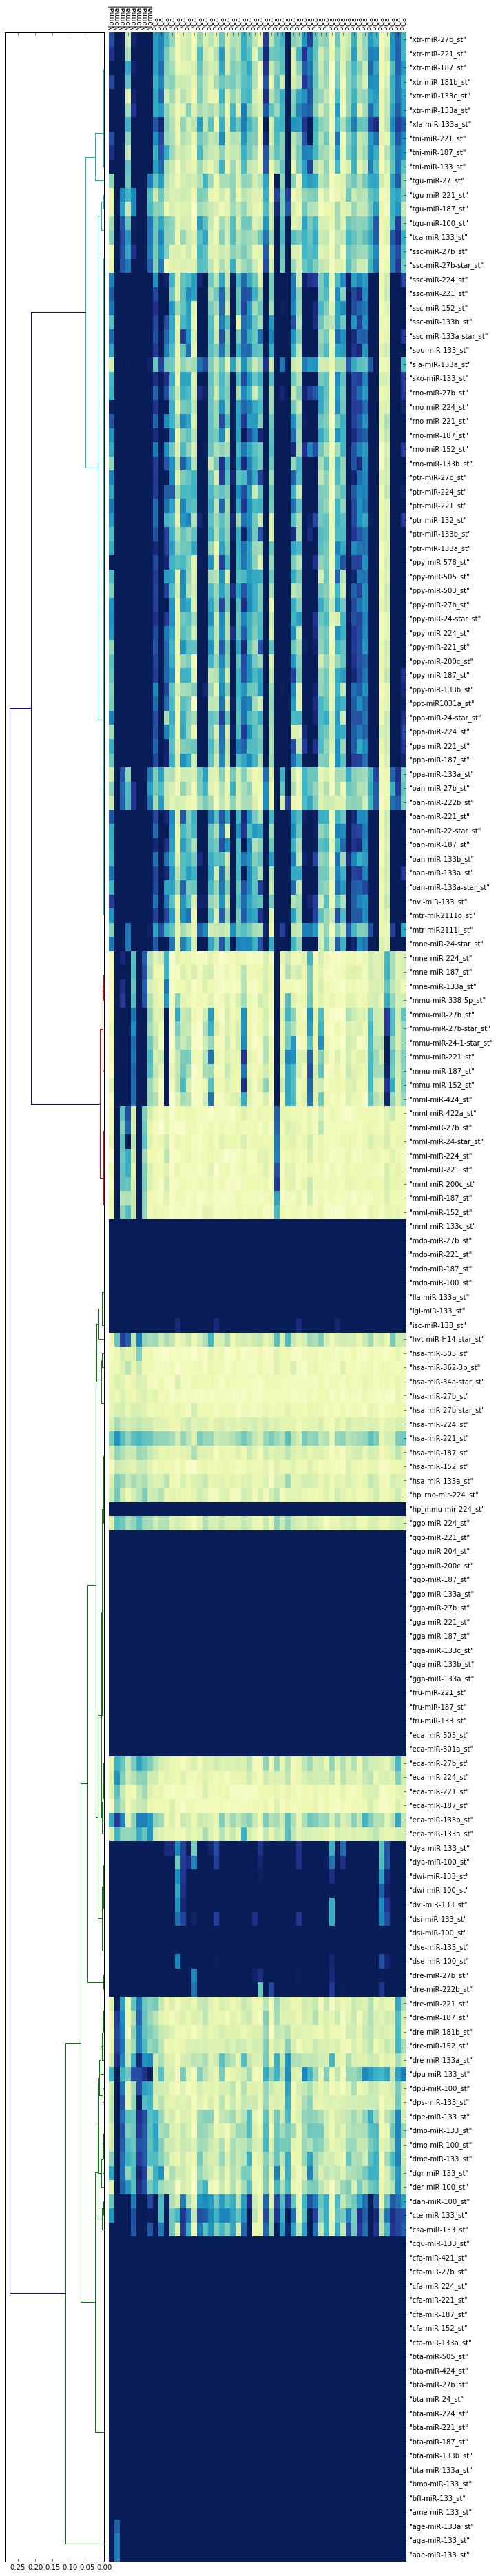

In [90]:
def show_matrix_expression(data,idx_genes,id_cond,dim=(16,10),show_ylabels=True):
    
    # data: matrix of data with headers
    # idx_genes: idx of genes 
    
    import matplotlib
    import scipy.cluster.hierarchy as cl
    import scipy.spatial.distance as ssd
    
    if isinstance(idx_genes,list):
        idx_genes = np.array(idx_genes,dtype=int)
    
    conditions = data[0,1:]
    genes = data[:,0]
    data_to_show = data[idx_genes+1,1:]
    
    # re-order genes using hierarchical clustering
    fig = plt.figure(num=None,figsize=(dim),dpi=250) 
    ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
    dmat = ssd.pdist(data_to_show,'cosine')
    Z = cl.linkage(ssd.squareform(dmat),method='average',metric='cosine')
    Z = cl.dendrogram(Z,orientation='left',no_labels=True)
    idx_reorder = Z['leaves']
    data_to_show = data_to_show[idx_reorder,:]    
    
    # plot heatmap
    ax = fig.add_axes([0.3,0.1,0.6,0.6])
    heatmap = ax.pcolor(data_to_show, cmap=plt.cm.YlGnBu,vmin=5,vmax=110)
    
    ## pour faire joli...............................................................................
    
    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data_to_show.shape[1])+0.5, minor=False)
    ax.set_yticks(np.arange(data_to_show.shape[0])+0.5, minor=False)

    # frame and labels position...
    ax.set_frame_on(False)
    ax.xaxis.tick_top()
    ax.grid(False)
    plt.xlim([0,np.shape(data_to_show)[1]])
    plt.ylim([0,np.shape(data_to_show)[0]])

    # set xlabels and ylabels
    if show_ylabels:
        ax.set_yticklabels([genes[ii+1] for ii in idx_genes], minor=False) 
    else:
        ax.yaxis.tick_right()
        ax.set_yticklabels([genes[ii+1] for ii in idx_genes])
    #conditions = [id_cond[s] for s in conditions]
    ax.set_xticklabels(conditions, minor=False)

    # rotate tick labels and set size
    plt.xticks(rotation=90) # rotate xlabels
    matplotlib.rcParams['xtick.labelsize'] = 10
    
    plt.show()

show_matrix_expression(data,idx_sg_corr,data[0,1:],dim=(10,85),show_ylabels=False)

(0, 1)

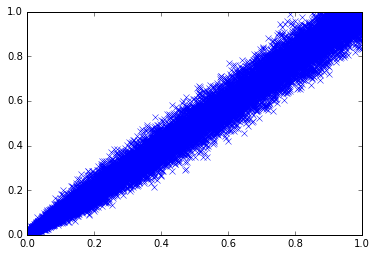

In [40]:
plt.figure()
plt.plot(co[1],pval_correl,'bx')
plt.xlim([0,1])
plt.ylim([0,1])

In [92]:
# t-test
################
# C'est la que ça merde surement !!
#print list(enumerate(data[0,1:]))

from scipy.stats import ttest_ind

N_genes = np.shape(data)[0]-1 # number of genes 
idx_PCa = [i for i,c in enumerate(data[0,1:]) if data[0,i]=='PCa'] # column idx with leukemia
print(idx_PCa)
cell_type = ['Normal','PCa']

# perform t-test between cancer cell type and normal cell type
pval_ct = [] # p-value across cell types
for k,ct in enumerate(cell_type[:-1]):  
    print("k: ", k)
    print("ct; ", ct)
    
    idx_normal = [i for i,c in enumerate(data[0,1:]) if data[0,i]==ct] # column idx corresponding to a cell type
    print(idx_normal)
    pval = []
    for g in range(1,N_genes+1): # loop over genes
    
        normal = np.array(data[g,idx_normal],dtype=float)
        PCa = np.array(data[g,idx_PCa],dtype=float)
        ttest = ttest_ind(normal,PCa,equal_var=False) # return t-value and its associated p-value
        pval.append(ttest[1])
    pval_ct.append(pval)
print np.shape(pval_ct)


[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
('k: ', 0)
('ct; ', 'Normal')
[1, 2, 3, 4, 5, 6, 7, 8]
(1, 20643)


In [91]:
# fdr correction
reload(stats)
fdr_pval = [stats.fdr_correction(pval_ct[ct]) for ct in range(len(pval_ct))]

print("fdr_pval: ", fdr_pval)
print ("idx_sg_corr: ", idx_sg_corr)

# keep genes for which the t-test p-value is smaller than the fdr-corrected threshold (fdr_pval)
idx_sg_ttest = []
for i in range(N_genes):
    significant = [1 if pval_ct[ct][i]<fdr_pval[ct] else 0 for ct in range(len(pval_ct))]
    # On compare avec 1 condition (PCa vs Normal)
    if sum(significant)==1:
        idx_sg_ttest.append(i)

# keep only genes that appear significantly in each t-test AND in the correlation test

#!!!!!!!!! Aucun gène en commun entre ttest et correlation -> vérifier qu'on prend pas les mauvaises données (oublier une
# collonne  ou qu'on foir pas ailleurs)
idx_sg_ttest = np.array(idx_sg_ttest)
for asdf in idx_sg_corr:
    if asdf in idx_sg_ttest:
        print("asdf: ", asdf)
#!!!!!!!

print( "idx_sg_ttest: ", idx_sg_ttest  )

idx_sg_final = np.array( list( set(idx_sg_ttest) & set(idx_sg_corr) ) )

print("idx_sg_final: ", idx_sg_final)

print('LISTE FINALE DE GENES:\n'+str(data[idx_sg_final+1,0]).strip('[]'))

('fdr_pval: ', [4.8672791540403999e-05])
('idx_sg_corr: ', array([  377,   739,   803,   888,  1263,  1386,  2064,  2065,  2126,
        2182,  2185,  2462,  2468,  2585,  2624,  3087,  3113,  3139,
        3185,  3188,  3197,  3264,  3885,  4191,  4233,  4363,  4440,
        4524,  4615,  4776,  4782,  4853,  4930,  5189,  5193,  5272,
        5297,  5315,  5321,  5390,  5392,  5403,  5482,  5488,  5570,
        5582,  5742,  5810,  5816,  5882,  5887,  6057,  6058,  6103,
        6155,  6158,  6166,  6174,  6288,  8059,  8082,  8112,  8176,
        8177,  8178,  8555,  8600,  8607,  8700,  8720,  8730,  8731,
        8742,  8744, 10516, 11063, 11472, 11519, 11557, 11664, 11670,
       11692, 11693, 11873, 11881, 12074, 12458, 12497, 12575, 12644,
       12733, 12789, 12820, 12830, 13011, 13039, 13058, 13082, 13108,
       13111, 13115, 13121, 13209, 13212, 13571, 13599, 13751, 13758,
       13767, 13768, 13854, 14195, 14213, 14232, 14235, 14340, 14343,
       14724, 14829, 14830, 148

IndexError: arrays used as indices must be of integer (or boolean) type